Please upload an image file:


Saving lena (1).jpg to lena (1) (1).jpg
Uploaded file: lena (1) (1).jpg
Image converted to grayscale
Image dimensions: 1027 x 1028


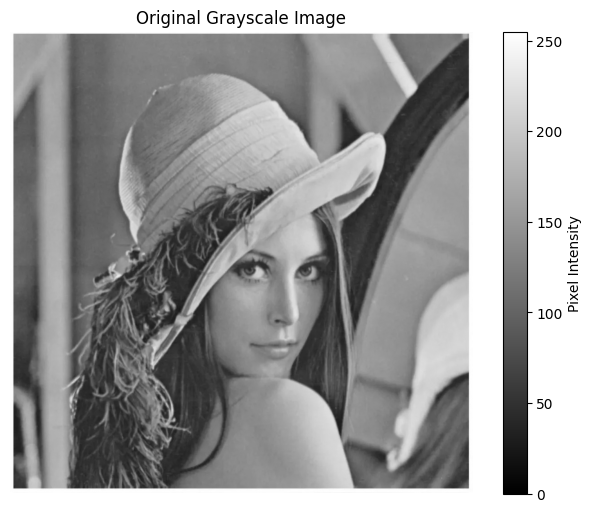

Pixel value range: [22.0, 255.0]


In [1]:
# ============================================
# Image Processing Project - Base Setup
# University of Kurdistan - Computer Department
# ============================================

# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files

# Upload image from your computer
print("Please upload an image file:")
uploaded = files.upload()

# Get the filename of uploaded image
filename = list(uploaded.keys())[0]
print(f"Uploaded file: {filename}")

# Read the image
img = Image.open(filename)

# Convert to grayscale if the image is colored
if img.mode != 'L':
    img_gray = img.convert('L')
    print("Image converted to grayscale")
else:
    img_gray = img
    print("Image is already grayscale")

# Convert to numpy array for processing
img_array = np.array(img_gray, dtype=np.float64)

# Get image dimensions
M, N = img_array.shape
print(f"Image dimensions: {M} x {N}")

# Display original grayscale image
plt.figure(figsize=(8, 6))
plt.imshow(img_array, cmap='gray', vmin=0, vmax=255)
plt.title('Original Grayscale Image')
plt.axis('off')
plt.colorbar(label='Pixel Intensity')
plt.show()

print(f"Pixel value range: [{img_array.min()}, {img_array.max()}]")

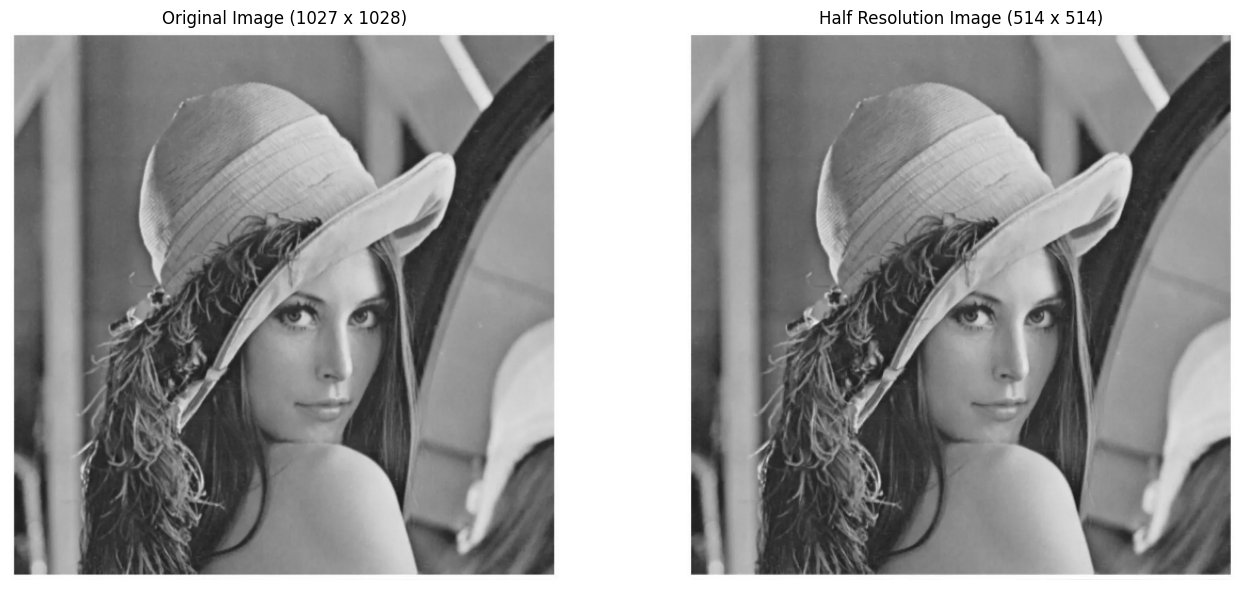

Resolution reduced from 1027x1028 to 514x514


In [5]:
# ============================================
# Question 1: Reduce Resolution by Half
# ============================================

# Method: Take every other pixel (subsampling)
# Select rows 0, 2, 4, ... and columns 0, 2, 4, ...
img_half = img_array[::2, ::2]

# Get new dimensions
M_new, N_new = img_half.shape

# Display original and half-resolution images side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Original image
axes[0].imshow(img_array, cmap='gray', vmin=0, vmax=255)
axes[0].set_title(f'Original Image ({M} x {N})')
axes[0].axis('off')

# Half resolution image
axes[1].imshow(img_half, cmap='gray', vmin=0, vmax=255)
axes[1].set_title(f'Half Resolution Image ({M_new} x {N_new})')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print(f"Resolution reduced from {M}x{N} to {M_new}x{N_new}")

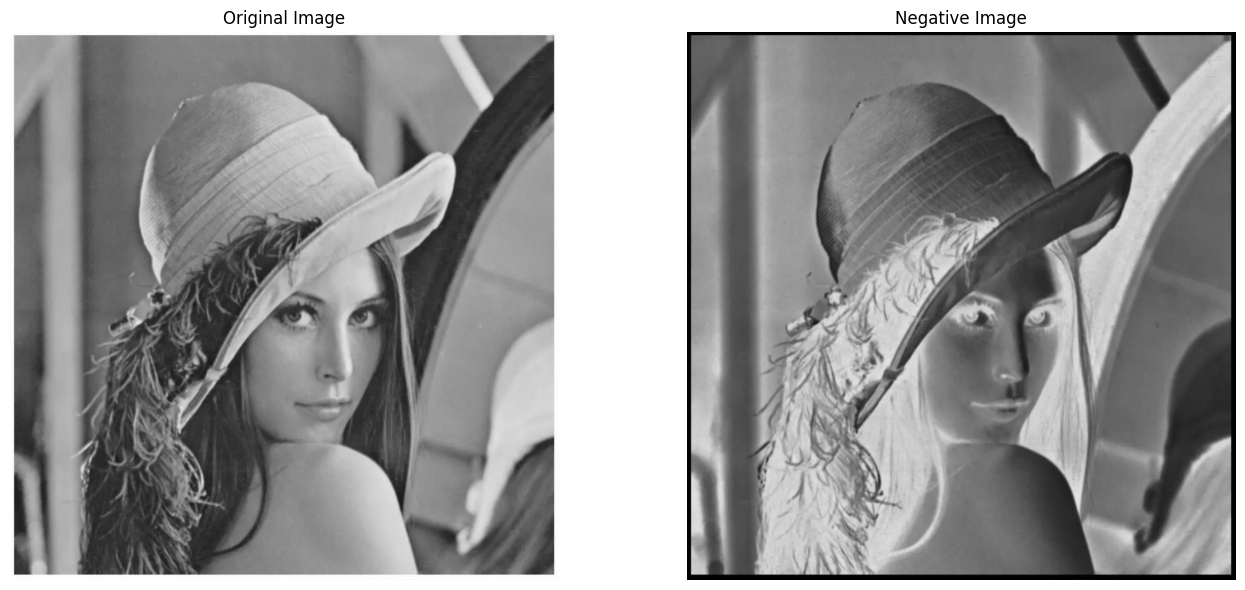

Negative transformation applied: s = 255 - r


In [6]:
# ============================================
# Question 2: Negative Image
# ============================================

# Formula: negative = (L-1) - r = 255 - r
# Where L = 256 (number of gray levels) and r = original pixel value
img_negative = 255 - img_array

# Display original and negative images side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Original image
axes[0].imshow(img_array, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Negative image
axes[1].imshow(img_negative, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Negative Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print("Negative transformation applied: s = 255 - r")

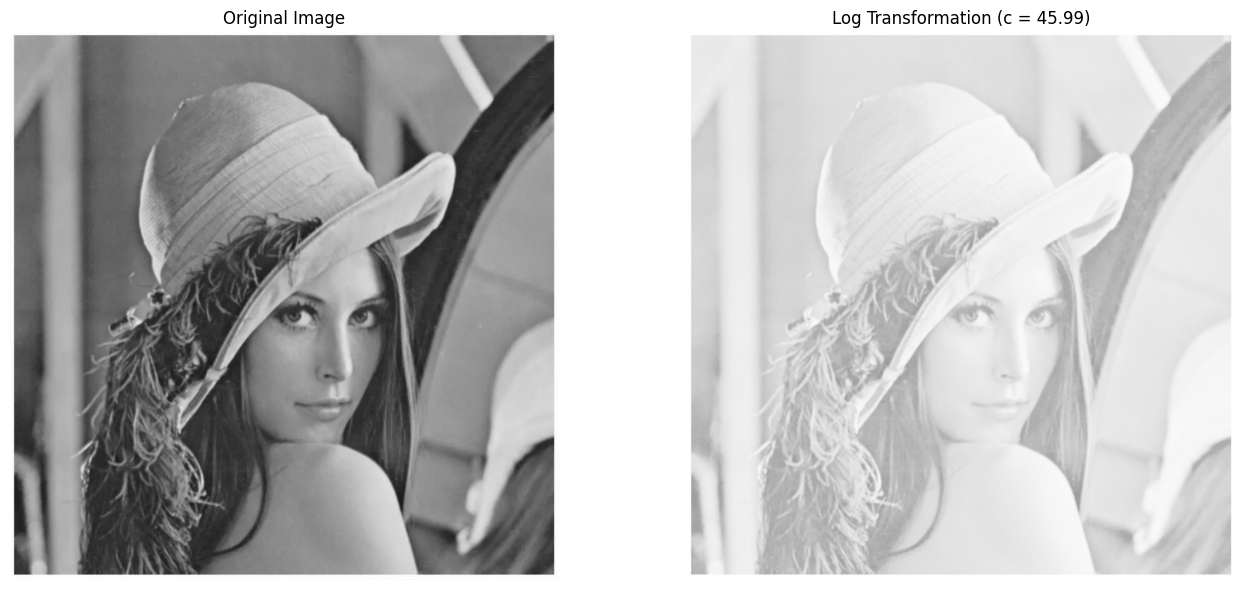

Log transformation applied: y = 45.99 * log(1 + x)


In [7]:
# ============================================
# Question 3: Log Transformation
# Formula: y = c * log(1 + x)
# ============================================

# Calculate c to scale output to [0, 255]
# When x = 255 (max input), we want y = 255 (max output)
# So: 255 = c * log(1 + 255) => c = 255 / log(256)
c = 255 / np.log(1 + 255)

# Apply log transformation
img_log = c * np.log(1 + img_array)

# Display original and log-transformed images side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Original image
axes[0].imshow(img_array, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Log transformed image
axes[1].imshow(img_log, cmap='gray', vmin=0, vmax=255)
axes[1].set_title(f'Log Transformation (c = {c:.2f})')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print(f"Log transformation applied: y = {c:.2f} * log(1 + x)")

Enter gamma value (e.g., 0.4, 1.0, 2.2): 1.2


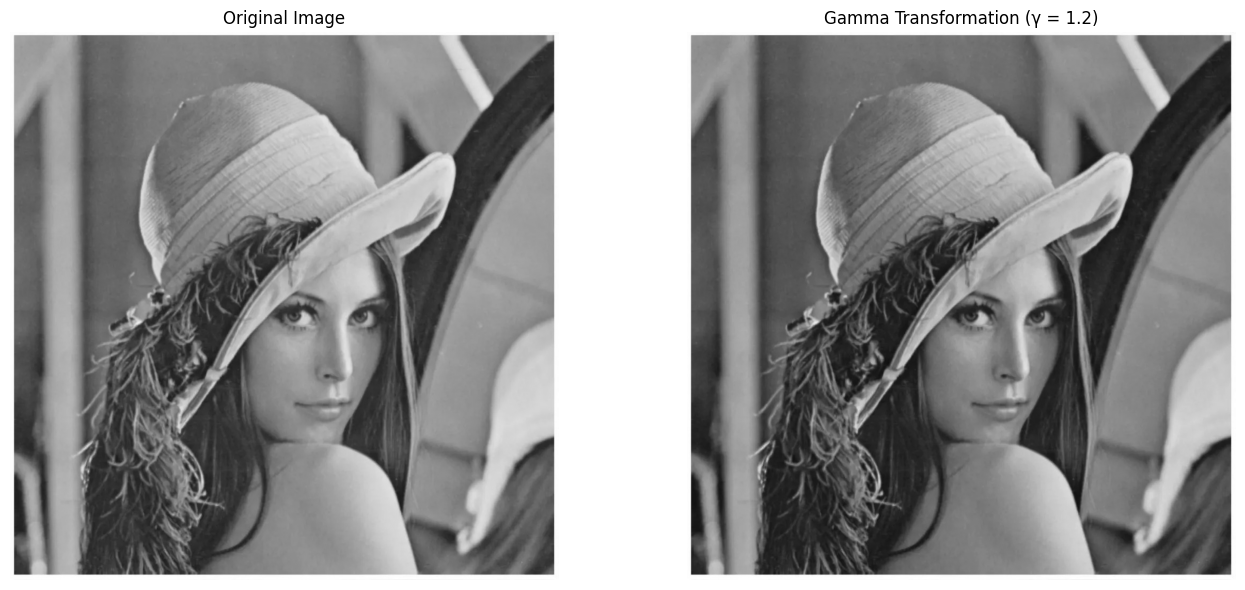

Gamma transformation applied: y = x^1.2
γ < 1: Brightens image | γ = 1: No change | γ > 1: Darkens image


In [10]:
# ============================================
# Question 4: Power (Gamma) Transformation
# Formula: y = c * x^γ
# ============================================

# Input gamma value from user
gamma = float(input("Enter gamma value (e.g., 0.4, 1.0, 2.2): "))

# Normalize image to [0, 1] range
img_normalized = img_array / 255.0

# Apply gamma transformation
# c = 1 when working with normalized values, then scale back to [0, 255]
img_gamma = np.power(img_normalized, gamma) * 255

# Display original and gamma-transformed images side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Original image
axes[0].imshow(img_array, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Gamma transformed image
axes[1].imshow(img_gamma, cmap='gray', vmin=0, vmax=255)
axes[1].set_title(f'Gamma Transformation (γ = {gamma})')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print(f"Gamma transformation applied: y = x^{gamma}")
print(f"γ < 1: Brightens image | γ = 1: No change | γ > 1: Darkens image")

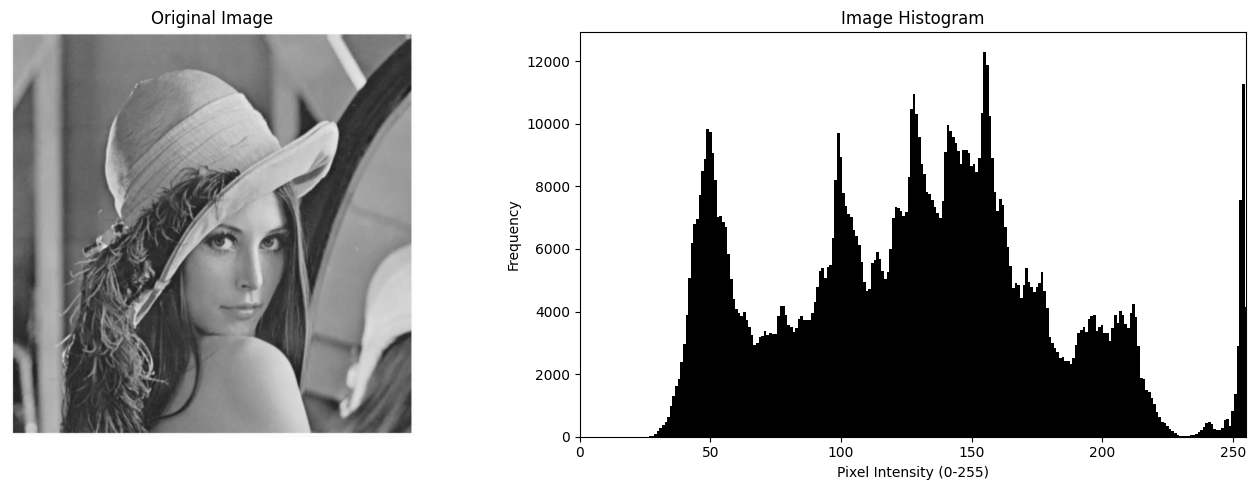

Total pixels: 1055756
Image size: 1027 x 1028 = 1055756 pixels


In [11]:
# ============================================
# Question 5: Calculate and Display Histogram
# ============================================

# Calculate histogram manually
# Count occurrences of each intensity level (0-255)
histogram = np.zeros(256)

for i in range(M):
    for j in range(N):
        pixel_value = int(img_array[i, j])
        histogram[pixel_value] += 1

# Display image and its histogram side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Original image
axes[0].imshow(img_array, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Histogram
axes[1].bar(range(256), histogram, color='black', width=1)
axes[1].set_title('Image Histogram')
axes[1].set_xlabel('Pixel Intensity (0-255)')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim([0, 255])

plt.tight_layout()
plt.show()

print(f"Total pixels: {int(histogram.sum())}")
print(f"Image size: {M} x {N} = {M*N} pixels")

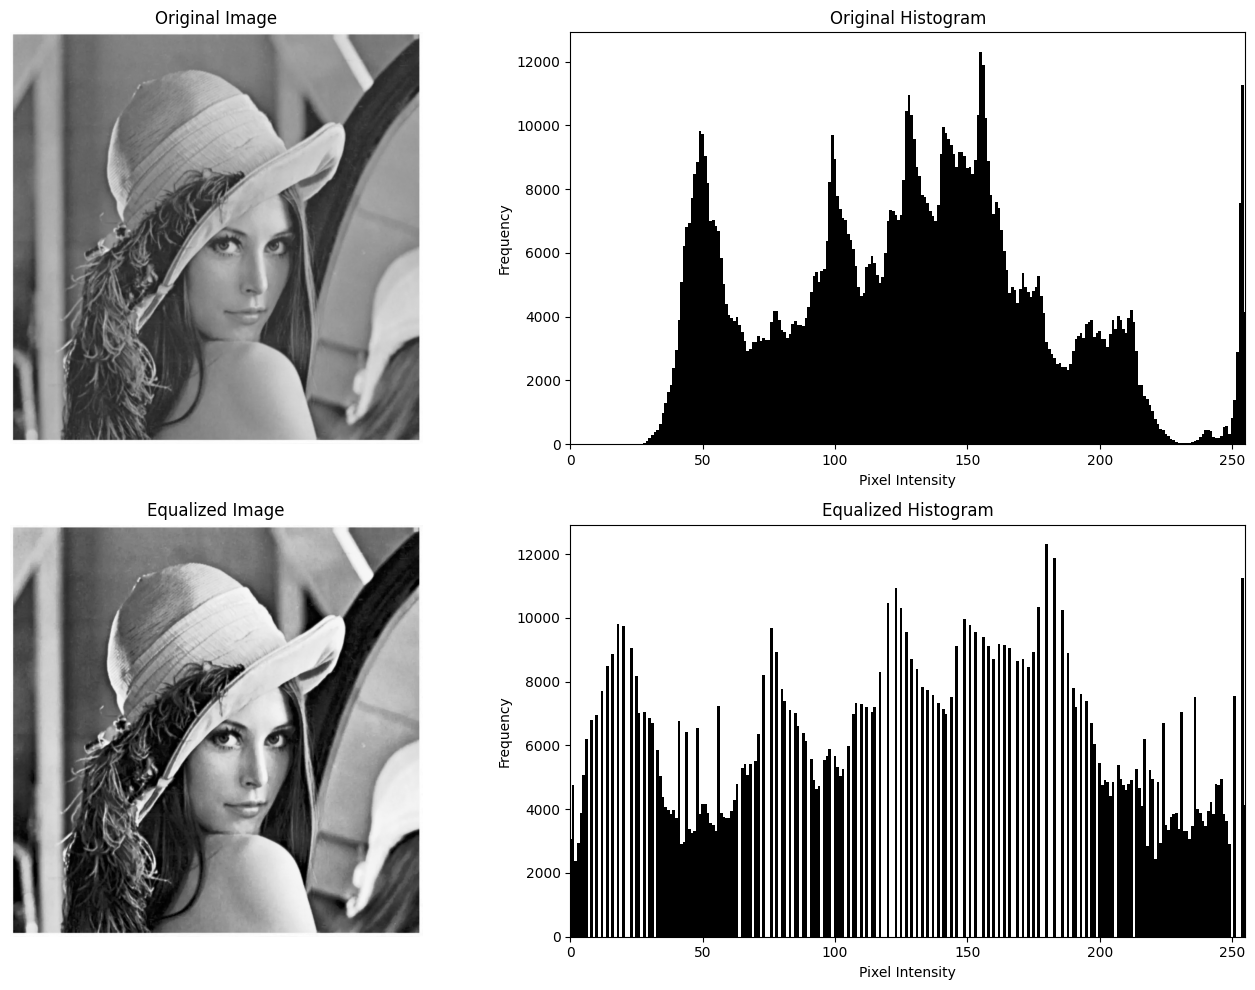

Histogram equalization completed!


In [12]:
# ============================================
# Question 6: Histogram Equalization
# ============================================

# Step 1: Calculate histogram of original image
histogram = np.zeros(256)
for i in range(M):
    for j in range(N):
        pixel_value = int(img_array[i, j])
        histogram[pixel_value] += 1

# Step 2: Calculate cumulative distribution function (CDF)
cdf = np.zeros(256)
cdf[0] = histogram[0]
for i in range(1, 256):
    cdf[i] = cdf[i-1] + histogram[i]

# Step 3: Normalize CDF to [0, 255] range (this is our transfer function)
cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
transfer_function = cdf_normalized.astype(np.uint8)

# Step 4: Apply transfer function to image
img_equalized = np.zeros_like(img_array)
for i in range(M):
    for j in range(N):
        pixel_value = int(img_array[i, j])
        img_equalized[i, j] = transfer_function[pixel_value]

# Step 5: Calculate histogram of equalized image
histogram_eq = np.zeros(256)
for i in range(M):
    for j in range(N):
        pixel_value = int(img_equalized[i, j])
        histogram_eq[pixel_value] += 1

# Display results
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Original image
axes[0, 0].imshow(img_array, cmap='gray', vmin=0, vmax=255)
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Original histogram
axes[0, 1].bar(range(256), histogram, color='black', width=1)
axes[0, 1].set_title('Original Histogram')
axes[0, 1].set_xlabel('Pixel Intensity')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_xlim([0, 255])

# Equalized image
axes[1, 0].imshow(img_equalized, cmap='gray', vmin=0, vmax=255)
axes[1, 0].set_title('Equalized Image')
axes[1, 0].axis('off')

# Equalized histogram
axes[1, 1].bar(range(256), histogram_eq, color='black', width=1)
axes[1, 1].set_title('Equalized Histogram')
axes[1, 1].set_xlabel('Pixel Intensity')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_xlim([0, 255])

plt.tight_layout()
plt.show()

print("Histogram equalization completed!")

Enter filter size N (e.g., 3, 5, 7): 10


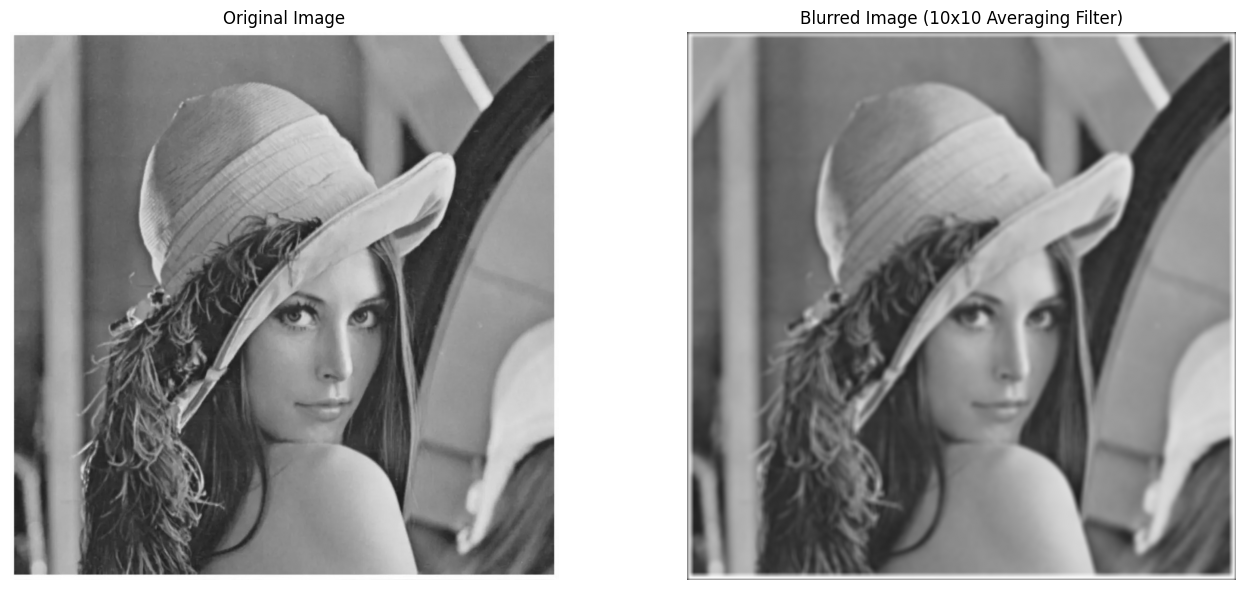

Averaging filter 10x10 applied successfully!


In [14]:
# ============================================
# Question 7: Blurring Filter (NxN Averaging Mask)
# ============================================

# Input filter size from user
N_filter = int(input("Enter filter size N (e.g., 3, 5, 7): "))

# Calculate padding size
pad = N_filter // 2

# Create padded image (zero padding)
img_padded = np.zeros((M + 2*pad, N + 2*pad))
img_padded[pad:pad+M, pad:pad+N] = img_array

# Apply averaging filter
img_blurred = np.zeros_like(img_array)

for i in range(M):
    for j in range(N):
        # Extract NxN neighborhood
        neighborhood = img_padded[i:i+N_filter, j:j+N_filter]
        # Calculate average of neighborhood
        img_blurred[i, j] = np.mean(neighborhood)

# Display original and blurred images side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Original image
axes[0].imshow(img_array, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Blurred image
axes[1].imshow(img_blurred, cmap='gray', vmin=0, vmax=255)
axes[1].set_title(f'Blurred Image ({N_filter}x{N_filter} Averaging Filter)')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print(f"Averaging filter {N_filter}x{N_filter} applied successfully!")

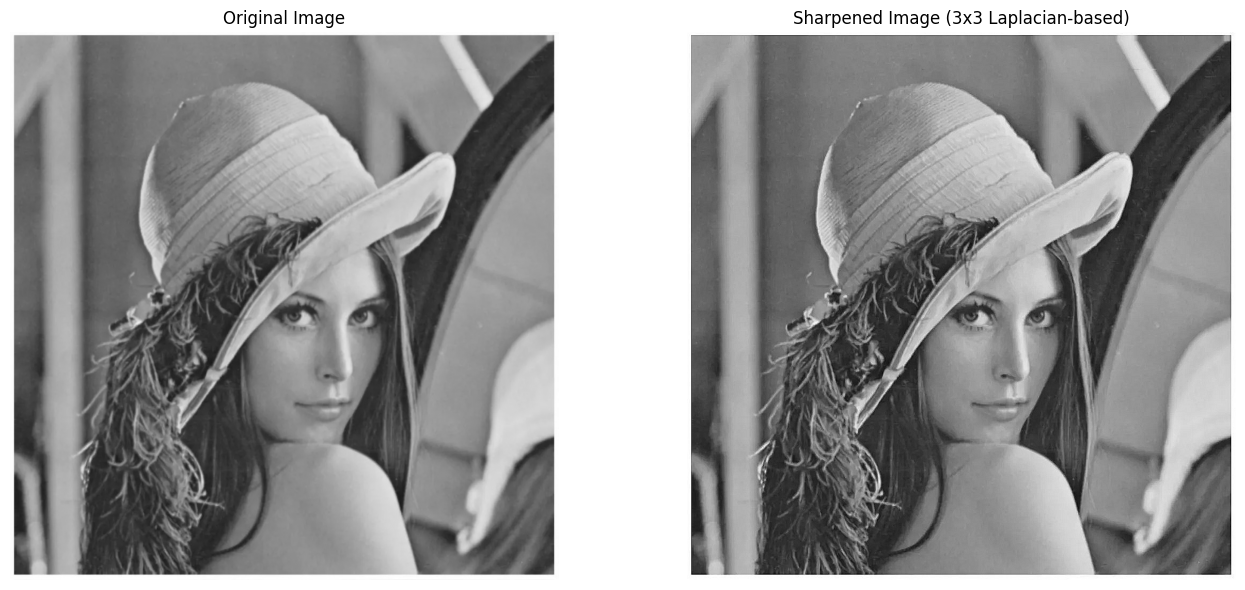

Sharpening kernel used:
[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]


In [15]:
# ============================================
# Question 8: Sharpening Filter (3x3 Mask)
# ============================================

# Define 3x3 sharpening kernel (Laplacian-based)
# This kernel enhances edges while keeping the image
sharpening_kernel = np.array([[ 0, -1,  0],
                              [-1,  5, -1],
                              [ 0, -1,  0]])

# Padding size for 3x3 kernel
pad = 1

# Create padded image (zero padding)
img_padded = np.zeros((M + 2*pad, N + 2*pad))
img_padded[pad:pad+M, pad:pad+N] = img_array

# Apply sharpening filter
img_sharpened = np.zeros_like(img_array)

for i in range(M):
    for j in range(N):
        # Extract 3x3 neighborhood
        neighborhood = img_padded[i:i+3, j:j+3]
        # Apply convolution (element-wise multiplication and sum)
        value = np.sum(neighborhood * sharpening_kernel)
        # Clip value to valid range [0, 255]
        img_sharpened[i, j] = np.clip(value, 0, 255)

# Display original and sharpened images side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Original image
axes[0].imshow(img_array, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Sharpened image
axes[1].imshow(img_sharpened, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Sharpened Image (3x3 Laplacian-based)')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print("Sharpening kernel used:")
print(sharpening_kernel)

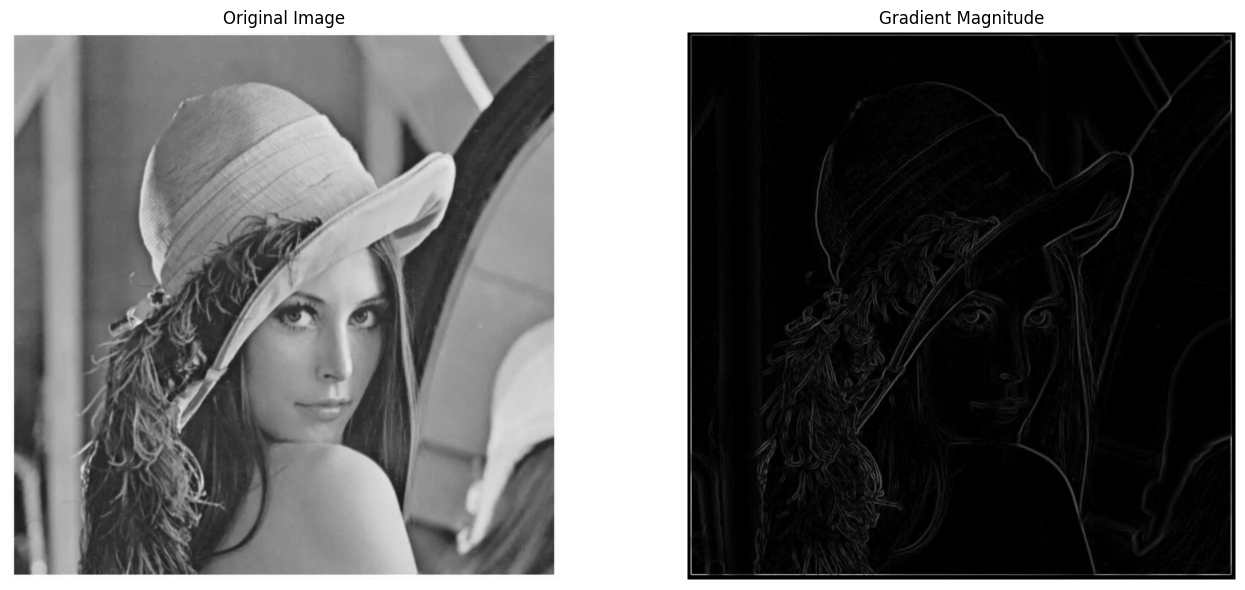

Gradient Magnitude Matrix (first 10x10 pixels):
[[1076.22 1015.02 1015.01 1014.   1015.01 1015.   1013.   1012.   1012.01
  1012.  ]
 [1016.02    4.47    4.      3.16    4.47    4.      2.83    3.16    1.41
     3.16]
 [1015.      2.      0.      2.83    1.41    2.83    6.32    7.07    5.1
     4.  ]
 [1013.      3.16    3.16    1.41    4.      3.16    3.16    4.      8.94
    12.  ]
 [1012.      1.41    3.16    8.6     7.07    8.6    14.76   32.65   36.88
    37.01]
 [1011.      3.16    4.47   10.77    4.24    7.07   48.41  165.41  279.65
   332.01]
 [1009.      4.47    4.47    9.49    5.1    10.     95.71  285.56  318.76
   315.01]
 [1009.      6.32    0.      5.1     7.21   20.1   126.75  324.01  228.84
    20.4 ]
 [1011.      5.1     3.16    3.16    7.07   27.17  139.    330.05  219.39
    12.17]
 [1012.      4.      4.      4.      4.     28.    140.    336.    220.
     0.  ]]

Full matrix shape: (1027, 1028)
Min value: 0.00
Max value: 1081.87
Mean value: 31.51


In [17]:
# ============================================
# Question 9: Gradient Magnitude
# ============================================

# Sobel kernels for gradient calculation
# Gx: detects vertical edges (horizontal gradient)
# Gy: detects horizontal edges (vertical gradient)
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]])

# Padding size for 3x3 kernel
pad = 1

# Create padded image
img_padded = np.zeros((M + 2*pad, N + 2*pad))
img_padded[pad:pad+M, pad:pad+N] = img_array

# Calculate gradients in x and y directions
gradient_x = np.zeros_like(img_array)
gradient_y = np.zeros_like(img_array)

for i in range(M):
    for j in range(N):
        # Extract 3x3 neighborhood
        neighborhood = img_padded[i:i+3, j:j+3]
        # Apply Sobel kernels
        gradient_x[i, j] = np.sum(neighborhood * sobel_x)
        gradient_y[i, j] = np.sum(neighborhood * sobel_y)

# Calculate gradient magnitude: |G| = sqrt(Gx^2 + Gy^2)
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

# Normalize to [0, 255] for display
gradient_magnitude_normalized = (gradient_magnitude / gradient_magnitude.max()) * 255

# Display results
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Original image
axes[0].imshow(img_array, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Gradient magnitude
axes[1].imshow(gradient_magnitude_normalized, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Gradient Magnitude')
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Display gradient magnitude matrix
print("=" * 50)
print("Gradient Magnitude Matrix (first 10x10 pixels):")
print("=" * 50)
print(np.round(gradient_magnitude[:10, :10], 2))
print()
print(f"Full matrix shape: {gradient_magnitude.shape}")
print(f"Min value: {gradient_magnitude.min():.2f}")
print(f"Max value: {gradient_magnitude.max():.2f}")
print(f"Mean value: {gradient_magnitude.mean():.2f}")

Enter threshold value (e.g., 50, 100, 150): 15


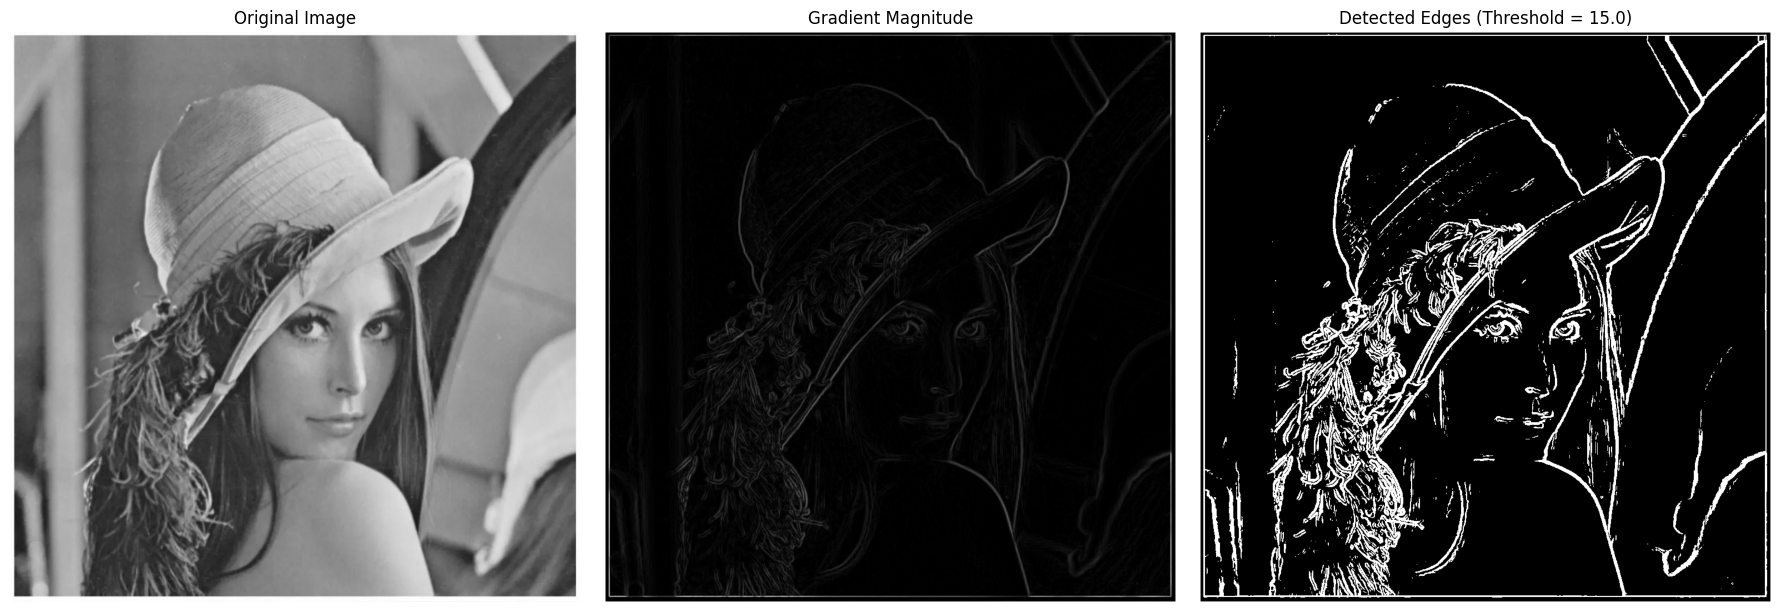

Edge detection completed with threshold = 15.0
Number of edge pixels: 114260
Percentage of edges: 10.82%


In [31]:
# ============================================
# Question 10: Edge Detection
# ============================================

# Sobel kernels for edge detection
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]])

# Padding size for 3x3 kernel
pad = 1

# Create padded image
img_padded = np.zeros((M + 2*pad, N + 2*pad))
img_padded[pad:pad+M, pad:pad+N] = img_array

# Calculate gradients in x and y directions
gradient_x = np.zeros_like(img_array)
gradient_y = np.zeros_like(img_array)

for i in range(M):
    for j in range(N):
        # Extract 3x3 neighborhood
        neighborhood = img_padded[i:i+3, j:j+3]
        # Apply Sobel kernels
        gradient_x[i, j] = np.sum(neighborhood * sobel_x)
        gradient_y[i, j] = np.sum(neighborhood * sobel_y)

# Calculate gradient magnitude
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

# Normalize gradient magnitude to [0, 255]
gradient_normalized = (gradient_magnitude / gradient_magnitude.max()) * 255

# Apply threshold to detect edges
# Pixels with gradient above threshold are edges (white), others are background (black)
threshold = float(input("Enter threshold value (e.g., 50, 100, 150): "))
edges = np.zeros_like(img_array)
edges[gradient_normalized > threshold] = 255

# Display results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Original image
axes[0].imshow(img_array, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Gradient magnitude
axes[1].imshow(gradient_normalized, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Gradient Magnitude')
axes[1].axis('off')

# Detected edges
axes[2].imshow(edges, cmap='gray', vmin=0, vmax=255)
axes[2].set_title(f'Detected Edges (Threshold = {threshold})')
axes[2].axis('off')

plt.tight_layout()
plt.show()

print(f"Edge detection completed with threshold = {threshold}")
print(f"Number of edge pixels: {np.sum(edges == 255)}")
print(f"Percentage of edges: {(np.sum(edges == 255) / (M * N)) * 100:.2f}%")

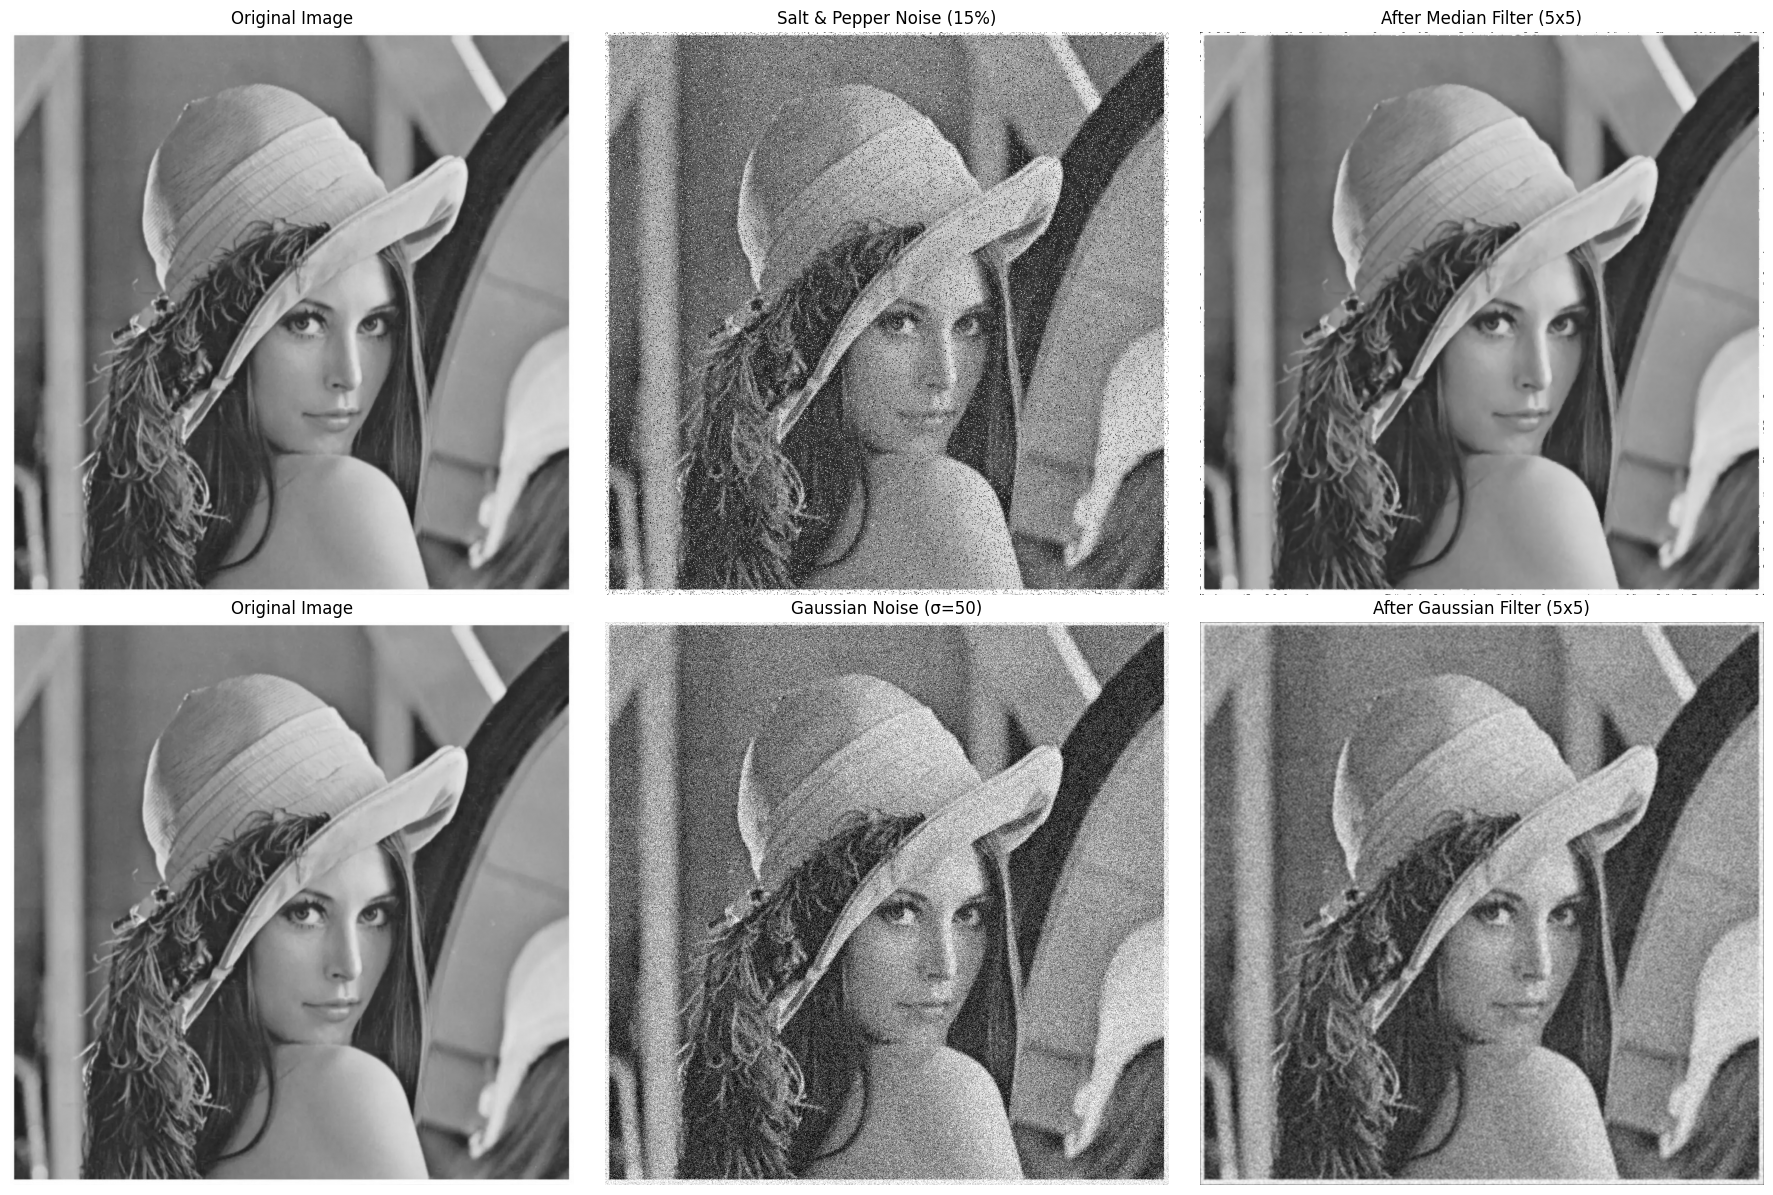

Noise addition and removal completed!
Salt & Pepper noise (15%) → Removed by Median Filter (5x5)
Gaussian noise (σ=50) → Removed by Gaussian Filter (5x5)


In [33]:
# ============================================
# Optional 1: Add Noise and Remove it
# ============================================

# --- Part A: Add Salt & Pepper Noise ---
def add_salt_pepper_noise(image, amount=0.05):
    noisy = image.copy()
    total_pixels = image.size

    # Add Salt (white pixels)
    num_salt = int(total_pixels * amount / 2)
    for k in range(num_salt):
        i = np.random.randint(0, M)
        j = np.random.randint(0, N)
        noisy[i, j] = 255

    # Add Pepper (black pixels)
    num_pepper = int(total_pixels * amount / 2)
    for k in range(num_pepper):
        i = np.random.randint(0, M)
        j = np.random.randint(0, N)
        noisy[i, j] = 0

    return noisy

# --- Part B: Add Gaussian Noise ---
def add_gaussian_noise(image, mean=0, std=25):
    noise = np.random.normal(mean, std, image.shape)
    noisy = image + noise
    noisy = np.clip(noisy, 0, 255)
    return noisy

# --- Part C: Median Filter (good for Salt & Pepper) ---
def median_filter(image, size=3):
    pad = size // 2
    img_padded = np.zeros((M + 2*pad, N + 2*pad))
    img_padded[pad:pad+M, pad:pad+N] = image

    result = np.zeros_like(image)
    for i in range(M):
        for j in range(N):
            neighborhood = img_padded[i:i+size, j:j+size]
            result[i, j] = np.median(neighborhood)
    return result

# --- Part D: Gaussian Filter (good for Gaussian noise) ---
def gaussian_filter(image, size=3, sigma=1):
    pad = size // 2

    # Create Gaussian kernel
    kernel = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            x = i - pad
            y = j - pad
            kernel[i, j] = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    kernel = kernel / kernel.sum()  # Normalize

    # Apply filter
    img_padded = np.zeros((M + 2*pad, N + 2*pad))
    img_padded[pad:pad+M, pad:pad+N] = image

    result = np.zeros_like(image)
    for i in range(M):
        for j in range(N):
            neighborhood = img_padded[i:i+size, j:j+size]
            result[i, j] = np.sum(neighborhood * kernel)
    return result

# === Apply Salt & Pepper Noise (15% of pixels) and Median Filter ===
img_sp_noisy = add_salt_pepper_noise(img_array, amount=0.15)
img_sp_filtered = median_filter(img_sp_noisy, size=5)

# === Apply Gaussian Noise (std=50) and Gaussian Filter ===
img_gauss_noisy = add_gaussian_noise(img_array, mean=0, std=50)
img_gauss_filtered = gaussian_filter(img_gauss_noisy, size=5, sigma=1.5)

# Display results
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Row 1: Salt & Pepper
axes[0, 0].imshow(img_array, cmap='gray', vmin=0, vmax=255)
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(img_sp_noisy, cmap='gray', vmin=0, vmax=255)
axes[0, 1].set_title('Salt & Pepper Noise (15%)')
axes[0, 1].axis('off')

axes[0, 2].imshow(img_sp_filtered, cmap='gray', vmin=0, vmax=255)
axes[0, 2].set_title('After Median Filter (5x5)')
axes[0, 2].axis('off')

# Row 2: Gaussian
axes[1, 0].imshow(img_array, cmap='gray', vmin=0, vmax=255)
axes[1, 0].set_title('Original Image')
axes[1, 0].axis('off')

axes[1, 1].imshow(img_gauss_noisy, cmap='gray', vmin=0, vmax=255)
axes[1, 1].set_title('Gaussian Noise (σ=50)')
axes[1, 1].axis('off')

axes[1, 2].imshow(img_gauss_filtered, cmap='gray', vmin=0, vmax=255)
axes[1, 2].set_title('After Gaussian Filter (5x5)')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

print("Noise addition and removal completed!")
print("Salt & Pepper noise (15%) → Removed by Median Filter (5x5)")
print("Gaussian noise (σ=50) → Removed by Gaussian Filter (5x5)")